# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [150]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## HIỂU DỮ LIỆU

1. Đọc dữ liệu

In [151]:
df = pd.read_csv("data/tips.csv")
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


2. Xóa cột Unnamed: 0

In [152]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.

In [153]:
print("Số dòng: ", df.shape[0])
print("Số thuộc tính: ", df.shape[1])

Số dòng:  244
Số thuộc tính:  7


4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng

- Thuộc tính phân loại: Sex, Smoker, Day, Time

- Thuộc tính định lương: total_bill, tip, size

5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?

In [154]:
sex_series = df["sex"].value_counts()
len_sex = len( df["sex"])

sex_df = sex_series.reset_index()
sex_df.columns = ["Giới tính", "Số lượng"]
sex_df

,Giới tính,Số lượng
0,Male,157
1,Female,87


In [155]:
male_rate =  sex_series.loc["Male"] / len_sex
female_rate =  sex_series.loc["Female"] / len_sex

print("Tỉ lệ nam: ", male_rate * 100)
print("Tỉ lệ nữ: ", female_rate * 100)

Tỉ lệ nam:  64.34426229508196
Tỉ lệ nữ:  35.65573770491803


6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?

In [156]:
smoker_series = df["smoker"].value_counts()
smoker_series.loc["Yes"]

np.int64(93)

7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?

In [157]:
day_series = df["day"].value_counts()
len_day = len(df["day"])

print("Ngày trong tuần khach hàng hay đến dùng bữa là: ", day_series.idxmax())
print("Tỷ lệ: ", day_series.max() / len_day * 100)

Ngày trong tuần khach hàng hay đến dùng bữa là:  Sat
Tỷ lệ:  35.65573770491803


8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?

In [158]:
time_series = df["time"].value_counts()
print("Nhà hàng phục vụ bữa ăn nhiều nhất: ", time_series.idxmax())


Nhà hàng phục vụ bữa ăn nhiều nhất:  Dinner


9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?

In [159]:
max_size = df["size"].max()
max_size

np.int64(6)

10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [160]:
df["size"].mean()

np.float64(2.569672131147541)

## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?

In [161]:
len(df[df["tip"].notna()]) / len(df["tip"]) * 100


100.0

2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?

In [162]:
tip_sum = df["tip"].sum()
total_sum = df["total_bill"].sum()
tip_sum / total_sum * 100

np.float64(15.153580224410025)

3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

In [163]:
tip_by_sex = df.groupby("sex").agg(trung_bình=("tip", "sum"), số_lượng=("tip", "count")).reset_index()
tip_by_sex.columns = ["Giới tính", "Tổng tiền tip", "Số lần tip"]
tip_by_sex

,Giới tính,Tổng tiền tip,Số lần tip
0,Female,246.51,87
1,Male,485.07,157


In [164]:
print("Giới tính được tip nhiều hơn: ")
tip_by_sex.loc[tip_by_sex["Tổng tiền tip"].idxmax(), ["Giới tính", "Tổng tiền tip"]]

Giới tính được tip nhiều hơn: 


Giới tính          Male
Tổng tiền tip    485.07
Name: 1, dtype: object

In [165]:
print("Giới tính nào được tip thường xuyên hơn: ")
tip_by_sex.loc[tip_by_sex["Số lần tip"].idxmax(), ["Giới tính", "Số lần tip"]]

Giới tính nào được tip thường xuyên hơn: 


Giới tính     Male
Số lần tip     157
Name: 1, dtype: object

4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

In [166]:
tip_by_smoker = df.groupby(["smoker"]).agg(sum_tip = ("tip", "sum"), count_tip = ("tip", "count")).reset_index()
tip_by_smoker.columns = ["Hút thuốc", "Tổng tiền tip", "Số lượng tip"]
tip_by_smoker

,Hút thuốc,Tổng tiền tip,Số lượng tip
0,No,451.77,151
1,Yes,279.81,93


In [167]:
print("Loại người tip nhiều hơn là: ")
tip_by_smoker.loc[tip_by_smoker["Tổng tiền tip"].idxmax(), ["Hút thuốc", "Tổng tiền tip"]]

Loại người tip nhiều hơn là: 


Hút thuốc            No
Tổng tiền tip    451.77
Name: 0, dtype: object

In [168]:
print("Loại người tip thường xuyên là: ")
tip_by_smoker.loc[tip_by_smoker["Số lượng tip"].idxmax(), ["Hút thuốc", "Số lượng tip"]]

Loại người tip thường xuyên là: 


Hút thuốc        No
Số lượng tip    151
Name: 0, dtype: object

5. Thống kê tổng số tiền tip nhận được theo ngày.

In [169]:
tip_by_day = df.groupby("day").agg(tip_sum=("tip", "sum")).reset_index()
tip_by_day

,day,tip_sum
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

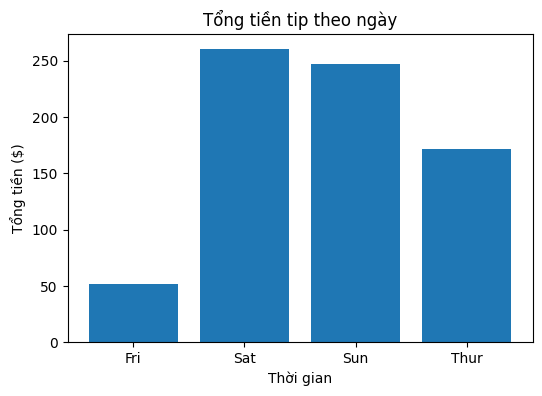

In [170]:
plt.figure(figsize=(6, 4))
plt.bar(tip_by_day["day"], tip_by_day["tip_sum"])

plt.xlabel("Thời gian")
plt.ylabel("Tổng tiền ($)")
plt.title("Tổng tiền tip theo ngày")
plt.show()

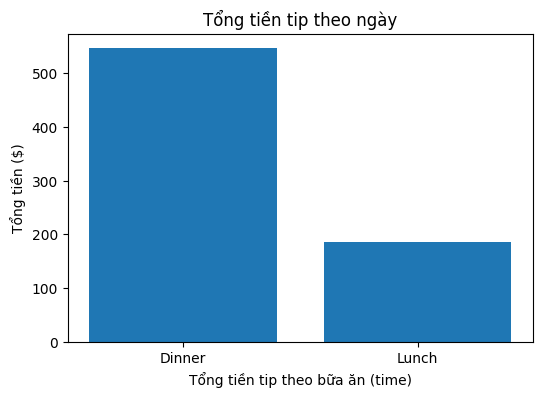

In [171]:
tip_by_time = df.groupby("time").agg(sum_tip=("tip", "sum")).reset_index()

plt.figure(figsize=(6, 4))
plt.bar(tip_by_time["time"], tip_by_time["sum_tip"])

plt.xlabel("Tổng tiền tip theo bữa ăn (time)")
plt.ylabel("Tổng tiền ($)")
plt.title("Tổng tiền tip theo ngày")
plt.show()

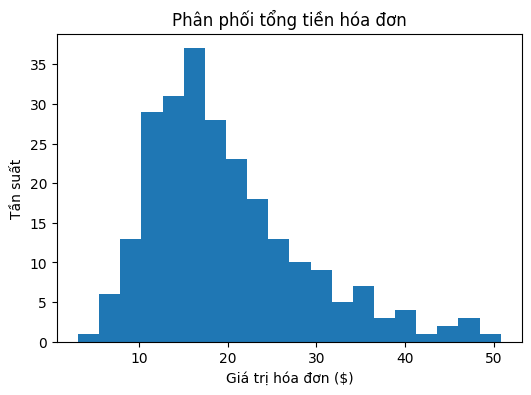

In [172]:
plt.figure(figsize=(6, 4)) 
plt.hist(df["total_bill"], bins=20)

plt.xlabel("Giá trị hóa đơn ($)")
plt.ylabel("Tần suất")
plt.title("Phân phối tổng tiền hóa đơn")
plt.show()


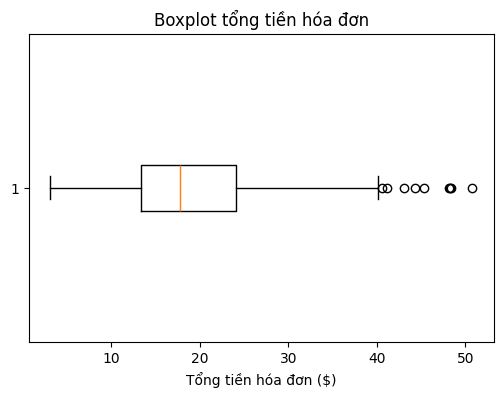

In [173]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["total_bill"], vert=False)

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.title("Boxplot tổng tiền hóa đơn")
plt.show()

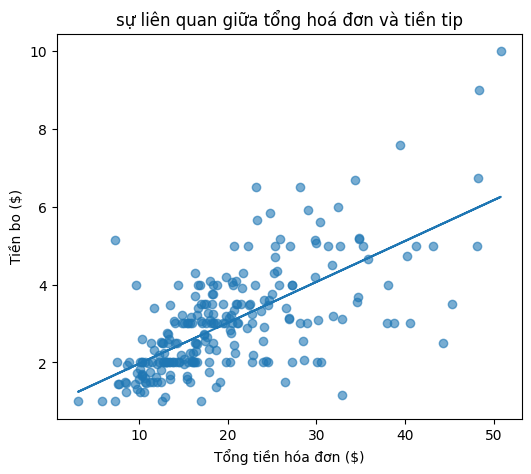

In [174]:
x = df["total_bill"]
y = df["tip"]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x, m*x + b)

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.ylabel("Tiền bo ($)")
plt.title("sự liên quan giữa tổng hoá đơn và tiền tip")
plt.show()

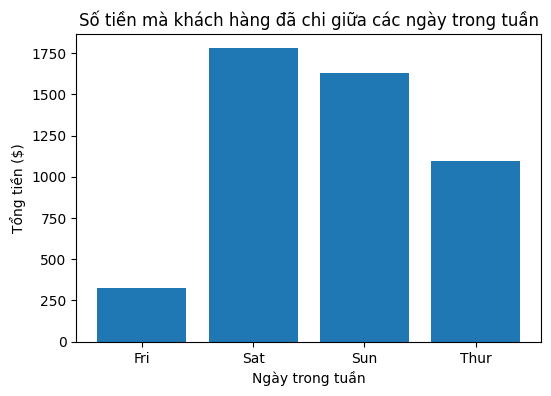

In [175]:
total_bill_by_day = df.groupby("day").agg(total_bill_sum=("total_bill", "sum")).reset_index()

plt.figure(figsize=(6, 4))
plt.bar(total_bill_by_day["day"], total_bill_by_day["total_bill_sum"])

plt.xlabel("Ngày trong tuần")
plt.ylabel("Tổng tiền ($)")
plt.title("Số tiền mà khách hàng đã chi giữa các ngày trong tuần")
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

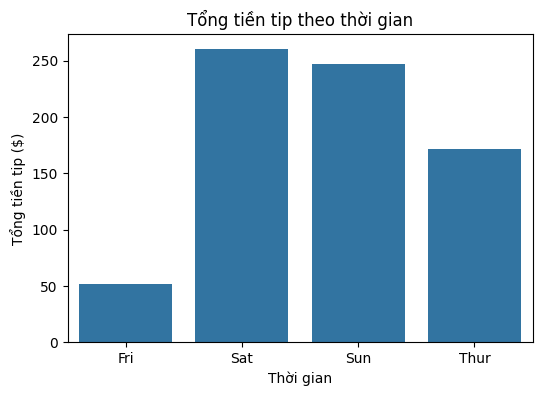

In [176]:
plt.figure(figsize=(6, 4))
sns.barplot(x="day", y="tip_sum", data=tip_by_day)

plt.xlabel("Thời gian")
plt.ylabel("Tổng tiền tip ($)")
plt.title("Tổng tiền tip theo thời gian")
plt.show()

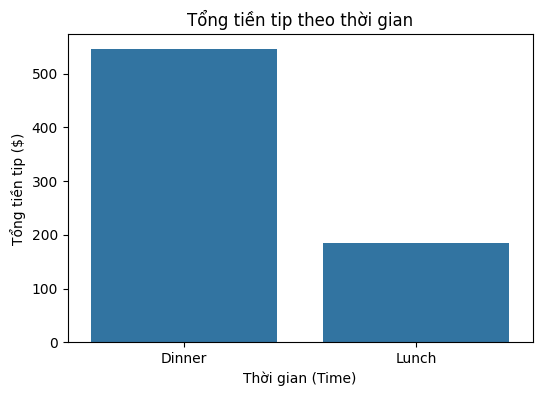

In [177]:
plt.figure(figsize=(6, 4))
sns.barplot(x="time", y="sum_tip", data=tip_by_time)

plt.xlabel("Thời gian (Time)")
plt.ylabel("Tổng tiền tip ($)")
plt.title("Tổng tiền tip theo thời gian")
plt.show()

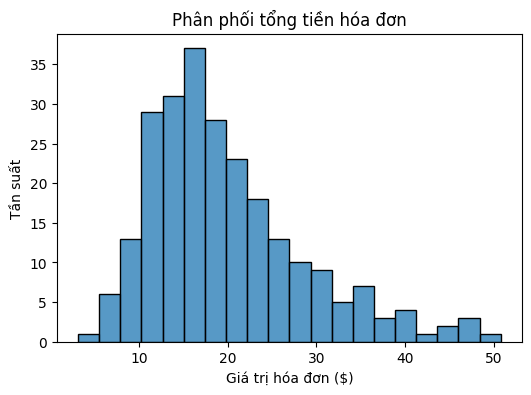

In [178]:
plt.figure(figsize=(6, 4)) 
sns.histplot(df["total_bill"], bins=20)

plt.xlabel("Giá trị hóa đơn ($)")
plt.ylabel("Tần suất")
plt.title("Phân phối tổng tiền hóa đơn")
plt.show()


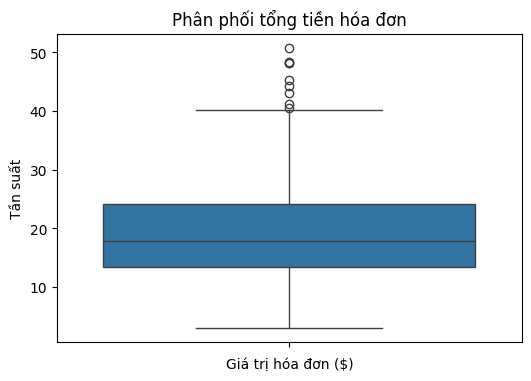

In [181]:
plt.figure(figsize=(6, 4)) 
sns.boxplot(df["total_bill"])

plt.xlabel("Giá trị hóa đơn ($)")
plt.ylabel("Tần suất")
plt.title("Phân phối tổng tiền hóa đơn")
plt.show()

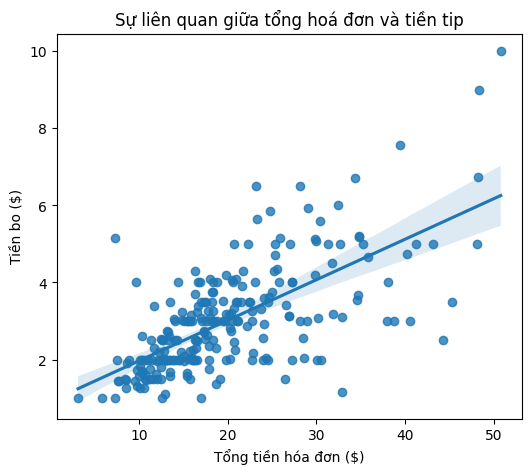

In [182]:
plt.figure(figsize=(6, 5))
sns.regplot(x=df["total_bill"], y=df["tip"])

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.ylabel("Tiền bo ($)")
plt.title("Sự liên quan giữa tổng hoá đơn và tiền tip")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11776\1540268505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="total_bill_sum", data=total_bill_by_day, palette="Blues")


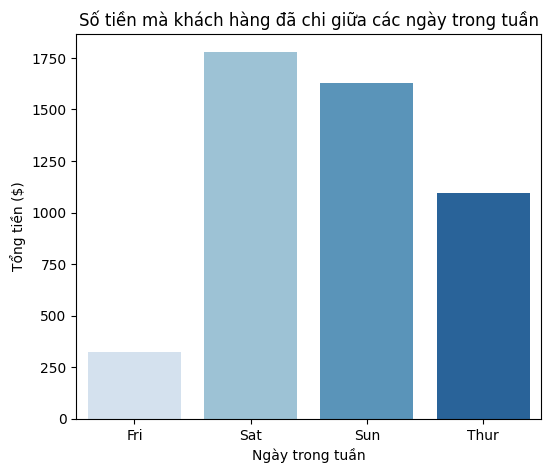

In [184]:
plt.figure(figsize=(6, 5))
sns.barplot(x="day", y="total_bill_sum", data=total_bill_by_day, palette="Blues")

plt.xlabel("Ngày trong tuần")
plt.ylabel("Tổng tiền ($)")
plt.title("Số tiền mà khách hàng đã chi giữa các ngày trong tuần")
plt.show()